In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv('working_raw_data.csv')

In [25]:
df.columns

Index(['PlaceholderID', 'Physics major at one time', 'gndr_flag',
       'citizenship', 'Ethnicity', 'First Gen', 'undergrad Residency',
       'first enrolled term at MSU', 'first enrolled level at MSU',
       'first UN term at MSU', 'first UN primary major code',
       'first UN primary major', 'first UN student level', 'Transfer',
       'most recent UN term (as of SS15)', 'most recent UN major code',
       'most recent UN major', 'most recent UN level',
       'UN grad term (blank if did not graduate)',
       'UN grad major (blank if did not graduate)', 'First Major Category',
       'Most Recent Major Category', 'Graduating Major Category'],
      dtype='object')

In [26]:
df.PlaceholderID.unique().size

105700

In [53]:
df2 = df.groupby(['Ethnicity', 'Graduating Major Category'])['Ethnicity'].count().unstack('Ethnicity').fillna(0)
df2['Asian / Pacific Islander'] = df2['Asian (non-Hispanic)'] + df2['Asian / Pacific Islander'] + df2['Hawaiian / Pacific Islander (non-Hispanic)']
del df2['Asian (non-Hispanic)'] , df2['Asian / Pacific Islander'] , df2['Hawaiian / Pacific Islander (non-Hispanic)']
df2['No Data'] = df2['Not Reported'] + df2['Not Requested']
del df2['Not Reported'], df2['Not Requested']
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

Ethnicity,American Indian/Alaskan Native (non-Hispanic),Black or African American (non-Hispanic),Hispanic Ethnicity,International,Two or more races (non-Hispanic),White (non-Hispanic),No Data,maximum
Graduating Major Category,,,,,,,,
Engineering,15.0,232.0,105.0,352.0,62.0,4094.0,61.0,4921.0
Has Not Graduated,194.0,4329.0,1941.0,5053.0,977.0,28358.0,506.0,41358.0
Non STEM,151.0,2515.0,1047.0,2375.0,349.0,29057.0,422.0,35916.0
Other STEM,86.0,1079.0,508.0,528.0,271.0,15487.0,245.0,18204.0
Physics,3.0,5.0,13.0,20.0,4.0,310.0,6.0,361.0


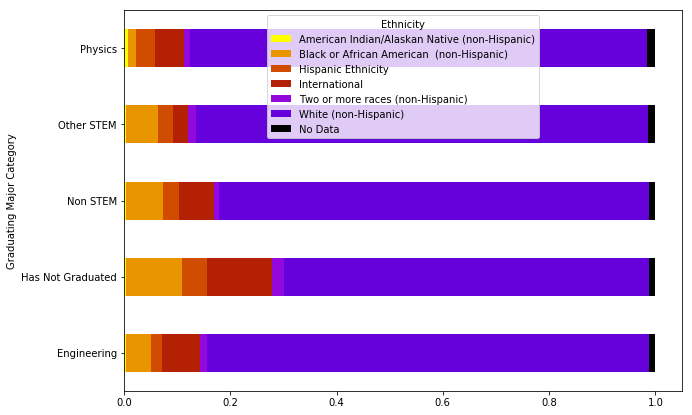

In [61]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['American Indian/Alaskan Native (non-Hispanic)',
       'Black or African American  (non-Hispanic)', 'Hispanic Ethnicity',
       'International', 'Two or more races (non-Hispanic)',
       'White (non-Hispanic)', 'No Data',]].plot(kind='barh', stacked=True, ax=ax, colormap='gnuplot_r')

In [63]:
df2 = df[df['Physics major at one time']=='Y'].groupby(['Ethnicity', 'Graduating Major Category'])['Ethnicity'].count().unstack('Ethnicity').fillna(0)
df2['Asian / Pacific Islander'] = df2['Asian (non-Hispanic)'] + df2['Asian / Pacific Islander'] + df2['Hawaiian / Pacific Islander (non-Hispanic)']
del df2['Asian (non-Hispanic)'] , df2['Asian / Pacific Islander'] , df2['Hawaiian / Pacific Islander (non-Hispanic)']
df2['No Data'] = df2['Not Reported']# + df2['Not Requested']
del df2['Not Reported']#, df2['Not Requested']
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

Ethnicity,American Indian/Alaskan Native (non-Hispanic),Black or African American (non-Hispanic),Hispanic Ethnicity,International,Two or more races (non-Hispanic),White (non-Hispanic),No Data,maximum
Graduating Major Category,,,,,,,,
Engineering,2.0,36.0,11.0,29.0,3.0,268.0,2.0,351.0
Has Not Graduated,5.0,29.0,37.0,104.0,26.0,558.0,13.0,772.0
Non STEM,1.0,8.0,4.0,10.0,1.0,109.0,4.0,137.0
Other STEM,0.0,5.0,5.0,8.0,4.0,180.0,3.0,205.0
Physics,3.0,5.0,13.0,20.0,4.0,302.0,6.0,353.0


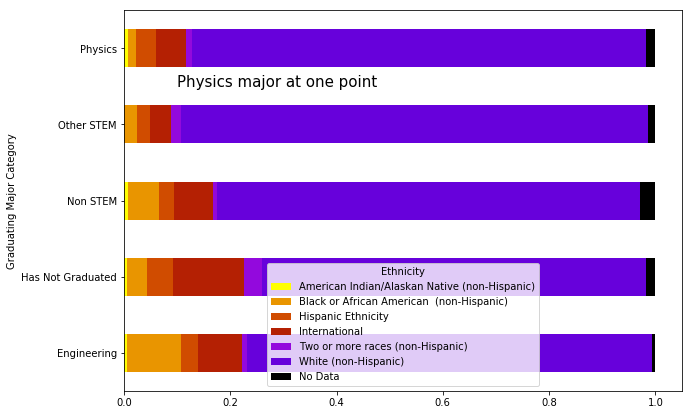

In [69]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['American Indian/Alaskan Native (non-Hispanic)',
       'Black or African American  (non-Hispanic)', 'Hispanic Ethnicity',
       'International', 'Two or more races (non-Hispanic)',
       'White (non-Hispanic)', 'No Data',]].plot(kind='barh', stacked=True, ax=ax, colormap='gnuplot_r')

ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)

In [74]:
df2 = df.groupby(['gndr_flag', 'Graduating Major Category'])['gndr_flag'].count().unstack('gndr_flag').fillna(0)
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

gndr_flag,F,M,maximum
Graduating Major Category,,,
Engineering,1208,4030,5238
Has Not Graduated,21520,21858,43378
Non STEM,21246,16122,37368
Other STEM,11403,7940,19343
Physics,63,310,373


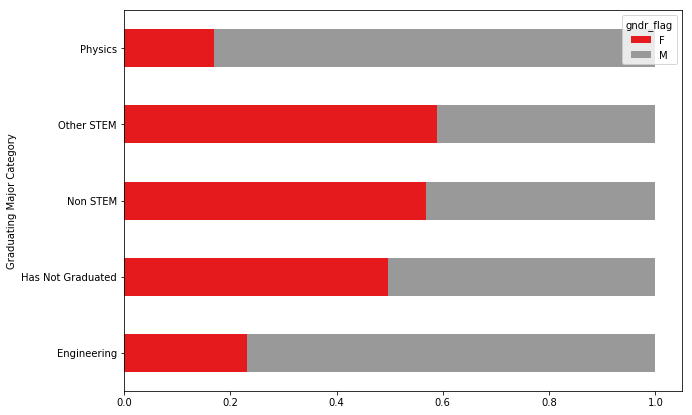

In [85]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['F', 'M']].plot(kind='barh', stacked=True, ax=ax, colormap='Set1')

# ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)

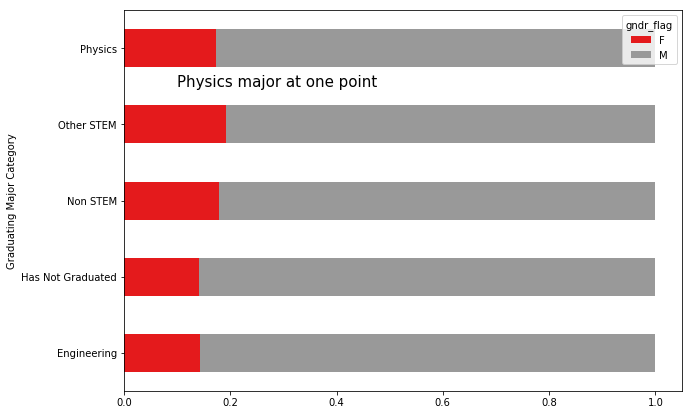

In [86]:
df2 = df[df['Physics major at one time']=='Y'].groupby(['gndr_flag', 'Graduating Major Category'])['gndr_flag'].count().unstack('gndr_flag').fillna(0)
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['F', 'M']].plot(kind='barh', stacked=True, ax=ax, colormap='Set1')

ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)